---
title: "Computational writing"
author: 
    - name: "Wolfram Barfuss"
    - affiliation: "University of Bonn"
---

In the following, we will enrich the scholarly writing experience with computations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic example: predator-prey dynamics

Let's assume we want to study predator-prey dynamics in ecology. The predator-prey equations are a famous model showing that species population sizes do not have to be stable, even in equilibrium. Instead, they can continuously oscillate.

Mathematically, we express the model as follows: 

Let $x_t \in \mathbb R$ be the number of prey and $y_t \in\mathbb R$ the number of predators in the population at time step $t$. They evolve according to

\begin{align}
x_{t+1} - x_{t} =: \Delta x =  \alpha x_t - \beta x_t y_t \\
y_{t+1} - y_{t} =: \Delta y =  \gamma y_t x_t - \delta y_t
\end{align}

where the parameter $\alpha$ represents the preys' birth rate, $\beta$ the prey's mortality rate, $\gamma$ the predator efficiency, and $\delta$ the predators' death rate.

Right below the mathematical model, we define the computational model:

In [2]:
def predprey_model(prey_birth_rate, 
                   prey_mortality, 
                   predator_efficiency, 
                   predator_death_rate,
                   initial_prey, 
                   initial_predators,
                   time_length):
    """ Discrete-time predator-prey model. """
    x = -1 * np.ones(time_length)
    y = -1 * np.ones(time_length)
    x[0] = initial_prey
    y[0] = initial_predators
    for t in range(1, time_length):
        x[t] = x[t-1] + prey_birth_rate * x[t-1]\
            - prey_mortality * y[t-1]*x[t-1]
        y[t] = y[t-1] + predator_efficiency * y[t-1]*x[t-1]\
            - predator_death_rate * y[t-1]
    return x, y

We test the model,

In [3]:
preys, predators = predprey_model(0.1, 0.1, 0.1, 0.01, 1.0, 1.0, 1000)

and portray the model output, make the Figure referenceable in by using the Quarto comment commands

    #| label: fig-modelrun
    #| fig-cap: "An exemplary predator-prey model run"

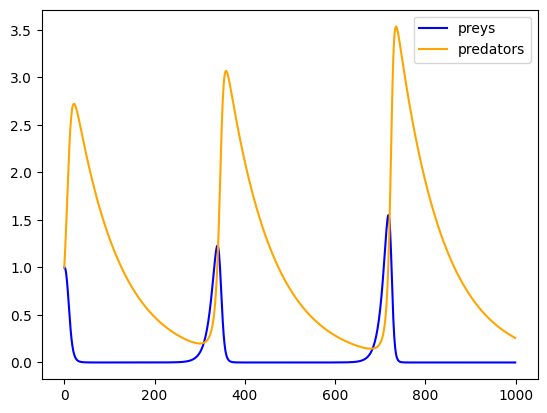

In [4]:
#| label: fig-modelrun
#| fig-cap: "An exemplary predator-prey model run."
plt.plot(preys, label="preys", color='blue') 
plt.plot(predators, label="predators", color='orange')
plt.legend();

@fig-modelrun shows an exemplary predator-prey model run.

:::{.callout-note}
This basic form of computational writing is the most transparency, collaboration, and reproducibility friednly. This approach allows us to cleanly display our Jupyter notebooks in other places, such as [GitHub](https://github.com/wbarfuss/pyCRLD/blob/main/nbs/index.ipynb), [NBViewer](https://nbviewer.org/github/wbarfuss/pyCRLD/blob/main/nbs/index.ipynb), or [Google Colab](https://colab.research.google.com/github/wbarfuss/pyCRLD/blob/main/nbs/index.ipynb).
:::

However, often model code and analysis are too complex to be presented in a single notebook. There a two ways to deal with this problem: Quarto embeds and reusing code written in a notebook with nbdev.


## Quarto embeds

Quarto lets you embed the output of another document with the embed shortcode. To do this, simply provide the document path and block or cell identifier, e.g, 

```{.markdown shortcodes=false}
{{< embed HeavyComputations.ipynb#fig-scatter-plot >}}
```


{{< embed HeavyComputations.ipynb#fig-scatter-plot >}}

@fig-scatter-plot shows a heavy scatter plot.

:::{.callout-note}
Quarto embeds can be a great and easy way to structure a project without using an additional tool. However, the Quarto embeds won't show in any other Jupyter environment.
:::

Another strategy is to reuse code written in a notebook with nbdev.

## Code reuse with nbdev

This part makes use of the excellent nbdev Python package [^nbdev]. nbdev provides a ready-to-use ecosystem for creating software packages with Jupyter Notebooks, i.e., writing, testing, documenting, and distributing. We use it, for example, here [^pycrld]. For our computational writing experience, however, we resort to individual components of nbdev.

See nbdev's getting-started guide [^nbdev-gs] for how to install it.

[^nbdev]: https://nbdev.fast.ai/
[^pycrld]: https://wbarfuss.github.io/pyCRLD/ and https://github.com/wbarfuss/pyCRLD
[^nbdev-gs]: https://nbdev.fast.ai/getting_started.html

One of the key features of nbdev is that it lets you export specific Jupyter Notebook cells to a plain Python file. These Python files can then be easily imported into other Jupyter Notebooks.

You only have to specify the name of Python module file to export to via

```
 #|default_exp <name>
```

Then, you can a export a Juptyer Notebook cell by simply prepending 

```
 #|export
```

to it.

:::{.callout-important}
To avoid a small conflict between Quarto and nbdev, make sure to add a space, ` `, before the nbdev directives `#|default_exp <name>` and `#|export`. See [here](https://github.com/quarto-dev/quarto-cli/issues/3152) for details.
:::

... Shows an example

In [5]:
from _code.HeavyComputations import noisy_predprey_model

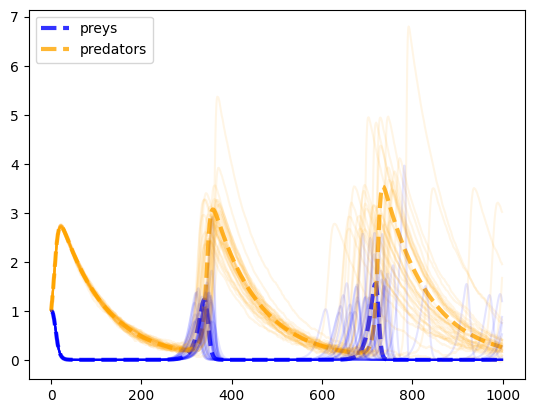

In [6]:
np.random.seed(42)

preys, predators = noisy_predprey_model(0.1, 0.1, 0.1, 0.01, 1.0, 1.0, 1000, 0.0)
plt.plot(preys, lw=3, ls='--', label="preys", color='blue', alpha=0.8) 
plt.plot(predators, lw=3, ls='--', label="predators", color='orange', alpha=0.8)

for _ in range(35):
    preys, predators = noisy_predprey_model(0.1, 0.1, 0.1, 0.01, 1.0, 1.0, 1000, 0.025)
    plt.plot(preys, color='blue', alpha=0.1)
    plt.plot(predators, color='orange', alpha=0.1)
plt.legend(); 

In [7]:
#| echo: false
#| output: false 
# To secretly compile this file as a standalone notebook, we execute
!cp 003ComputationalWriting.ipynb 003ComputationalWriting_.ipynb
!quarto render 003ComputationalWriting_.ipynb --to pdf
!mv 003ComputationalWriting_.pdf __output/003ComputationalWriting.pdf
!rm -r 003ComputationalWriting_*

pandoc 
  to: latex
  output-file: 003ComputationalWriting_.tex
  standalone: true
  pdf-engine: xelatex
  variables:
    graphics: true
    tables: true
  default-image-extension: pdf
  
metadata
  documentclass: scrartcl
  classoption:
    - DIV=11
    - numbers=noendperiod
  papersize: letter
  header-includes:
    - '\KOMAoption{captions}{tableheading}'
  block-headings: true
  title: Computational writing
  author:
    - name: Wolfram Barfuss
    - affiliation: University of Bonn
  

Rendering PDF
running xelatex - 1
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering extended mode
  
running xelatex - 2
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering extended mode
  

Output created: 003ComputationalWriting_.pdf

